In [27]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy as np
import string
import random
import string
import pandas as pd
from sklearn import linear_model
import csv
import ast
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
allRecipes = pd.read_csv('RAW_recipes.csv')  

In [4]:
allRecipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [5]:
interactions = pd.read_csv('RAW_interactions.csv')

In [6]:
interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [7]:
allRecipes.shape, interactions.shape

((231637, 12), (1132367, 5))

In [8]:
data = pd.merge(allRecipes, interactions, how='outer', left_on='id', right_on='recipe_id')

In [13]:
from pathlib import Path  
filepath = Path('data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)

In [14]:
data = []
with open('data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        data.append(row)
data[1]

['0',
 'arriba   baked winter squash mexican style',
 '137739',
 '55',
 '47892',
 '2005-09-16',
 "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
 '[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]',
 '11',
 "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 

In [15]:
len(data)

1132368

In [17]:
type(data[1][0])

str

In [21]:
def datum(d):
    return [d[1],
            int(d[2]),
            int(d[3]),
            d[5],
            list(ast.literal_eval(d[6])),
            list(ast.literal_eval(d[7])),
            int(d[8]),
            ' '.join(list(ast.literal_eval(d[9]))),
            list(ast.literal_eval(d[11])),
            int(d[12]),
            d[15],
            int(d[16]),
            d[17]
           ]

In [22]:
a = datum(data[1])

In [24]:
all_data = list(map(lambda x: datum(x), data[1:]))
all_data[:5]

[['arriba   baked winter squash mexican style',
  137739,
  55,
  '2005-09-16',
  ['60-minutes-or-less',
   'time-to-make',
   'course',
   'main-ingredient',
   'cuisine',
   'preparation',
   'occasion',
   'north-american',
   'side-dishes',
   'vegetables',
   'mexican',
   'easy',
   'fall',
   'holiday-event',
   'vegetarian',
   'winter',
   'dietary',
   'christmas',
   'seasonal',
   'squash'],
  [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0],
  11,
  'make a choice and proceed with recipe depending on size of squash , cut into half or fourths remove seeds for spicy squash , drizzle olive oil or melted butter over each cut squash piece season with mexican seasoning mix ii for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece season with sweet mexican spice mix bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin be careful not to burn the squash especially if you opt to use sugar

Exploratory Data Analysis

Finding the counts of each respective raiting:

In [30]:
ratings = np.array([i[11] for i in all_data])
ratings

array([5, 5, 5, ..., 1, 5, 0])

<AxesSubplot: ylabel='Count'>

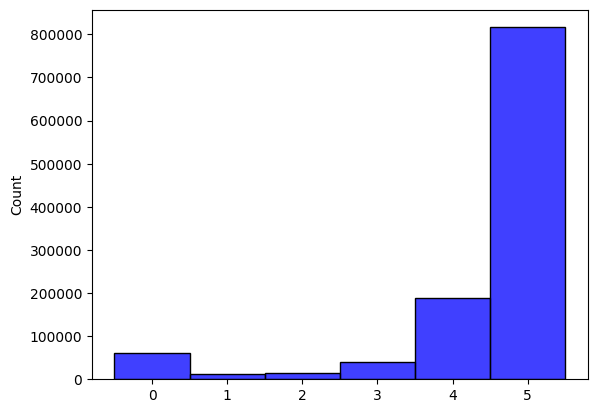

In [39]:
sns.histplot(ratings, color = 'blue', discrete=True, binwidth=1)

Finding the ratings agaisnt the number of calories of each respective recipe:

In [40]:
calories = np.array([i[5][0] for i in all_data])
calories

array([ 51.5,  51.5,  51.5, ..., 174.9, 174.9, 174.9])

In [42]:
max(calories)

434360.2

<AxesSubplot: >

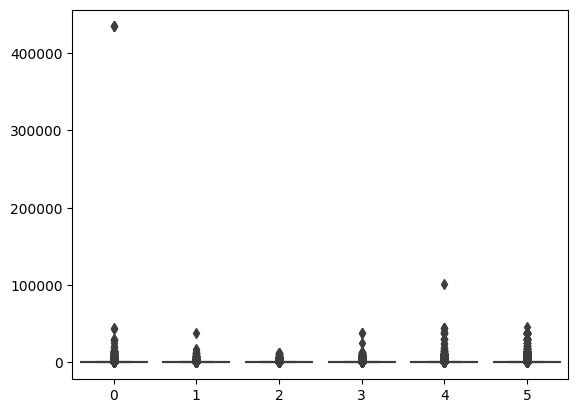

In [41]:
sns.boxplot(x=ratings, y=calories)